In [1]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']
print(len(dataset))

245660


In [2]:
guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
print(len(dataset_2018))
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
print(len(dataset_2019))
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
print(len(dataset_2020))
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']
78949
81807
84904


In [3]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
# print(sigoongu)

25 개


In [4]:
# 강동구에 존재하는 업종중분류명종류 추출
kangdonggu = dataset[dataset['시군구명']=='강동구']
kangdonggu_upjong = list(set(kangdonggu['업종중분류명']))
# print(kangdonggu_upjong)

In [5]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    # print(gu,": ", len(temp),": ", temp)

In [6]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    # print(gu,": ", temp)

In [7]:
# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

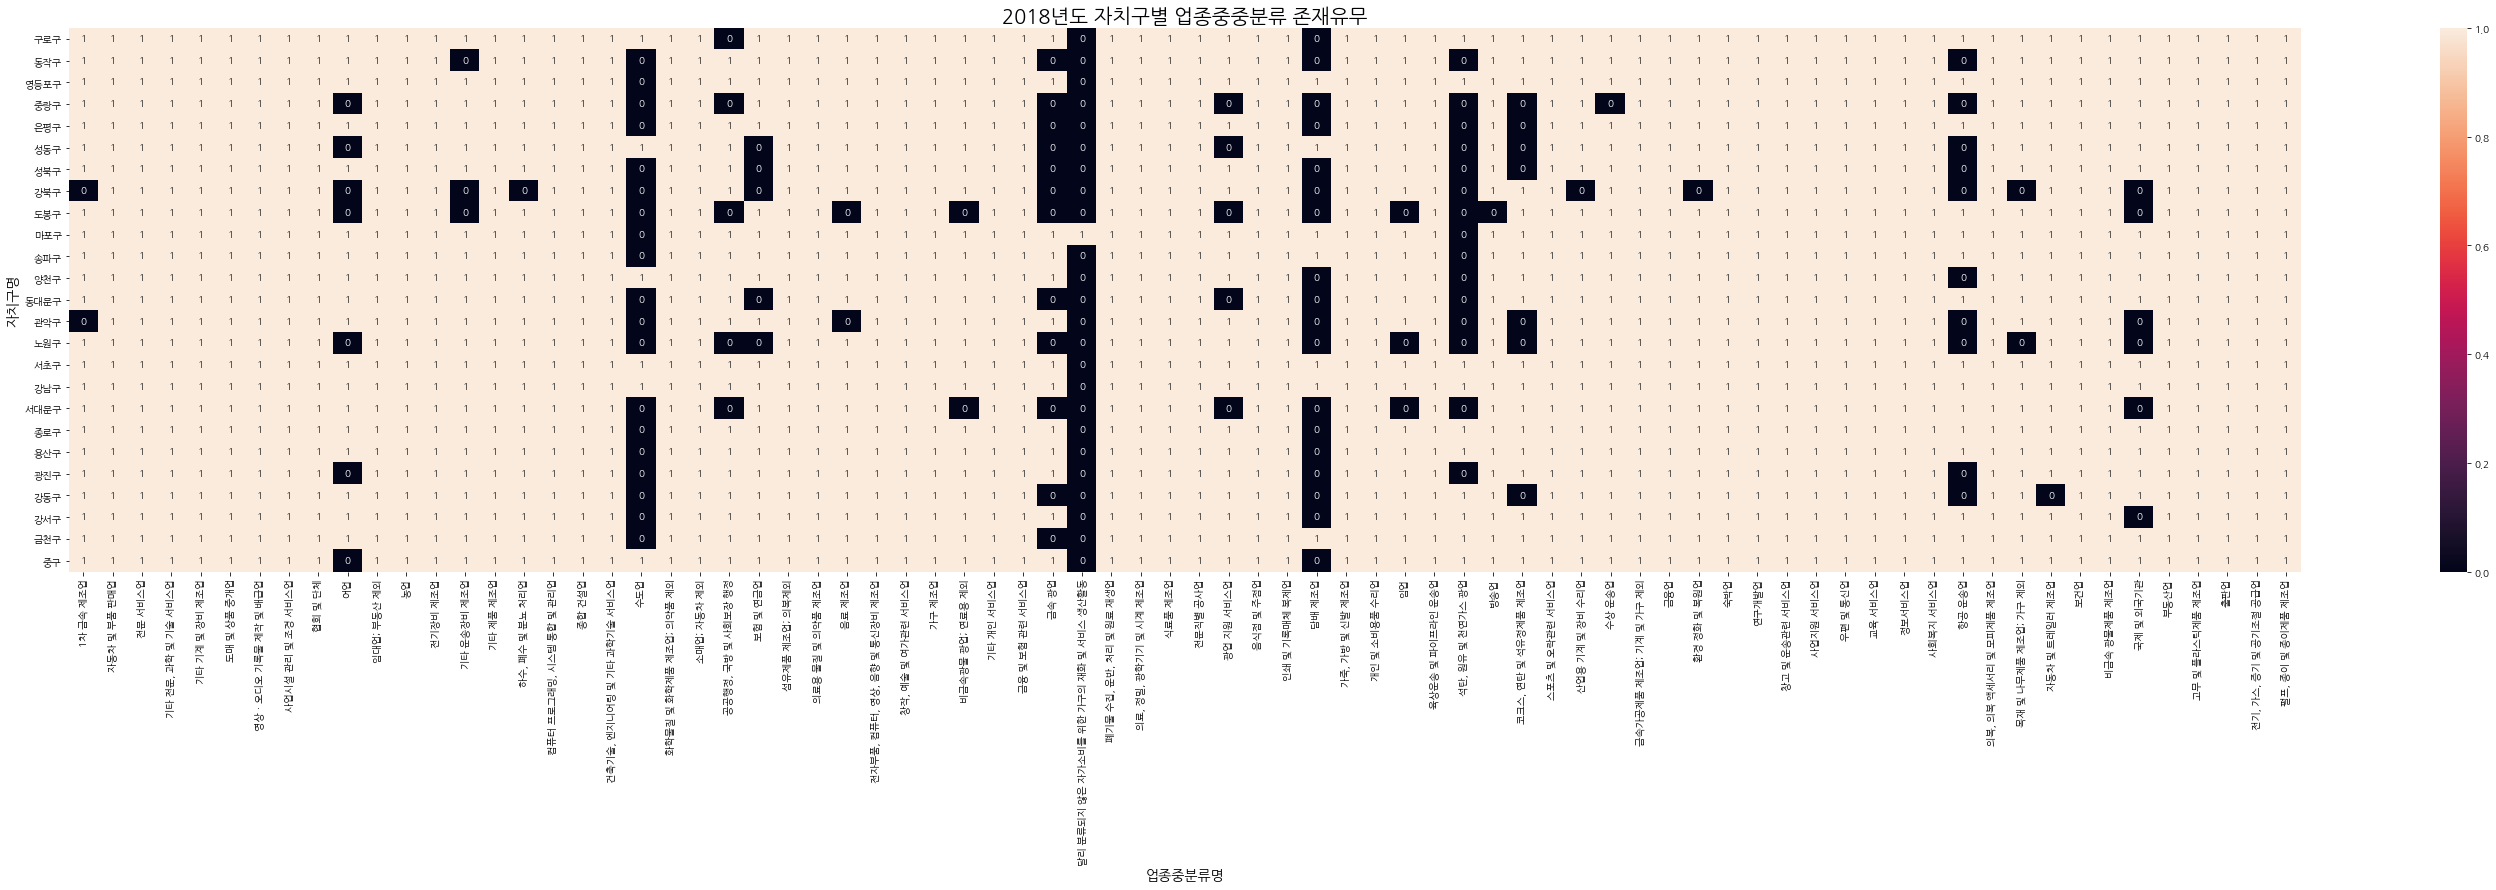

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2018[dataset_2018['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True)
plt.title('2018년도 자치구별 업종중중분류 존재유무', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()

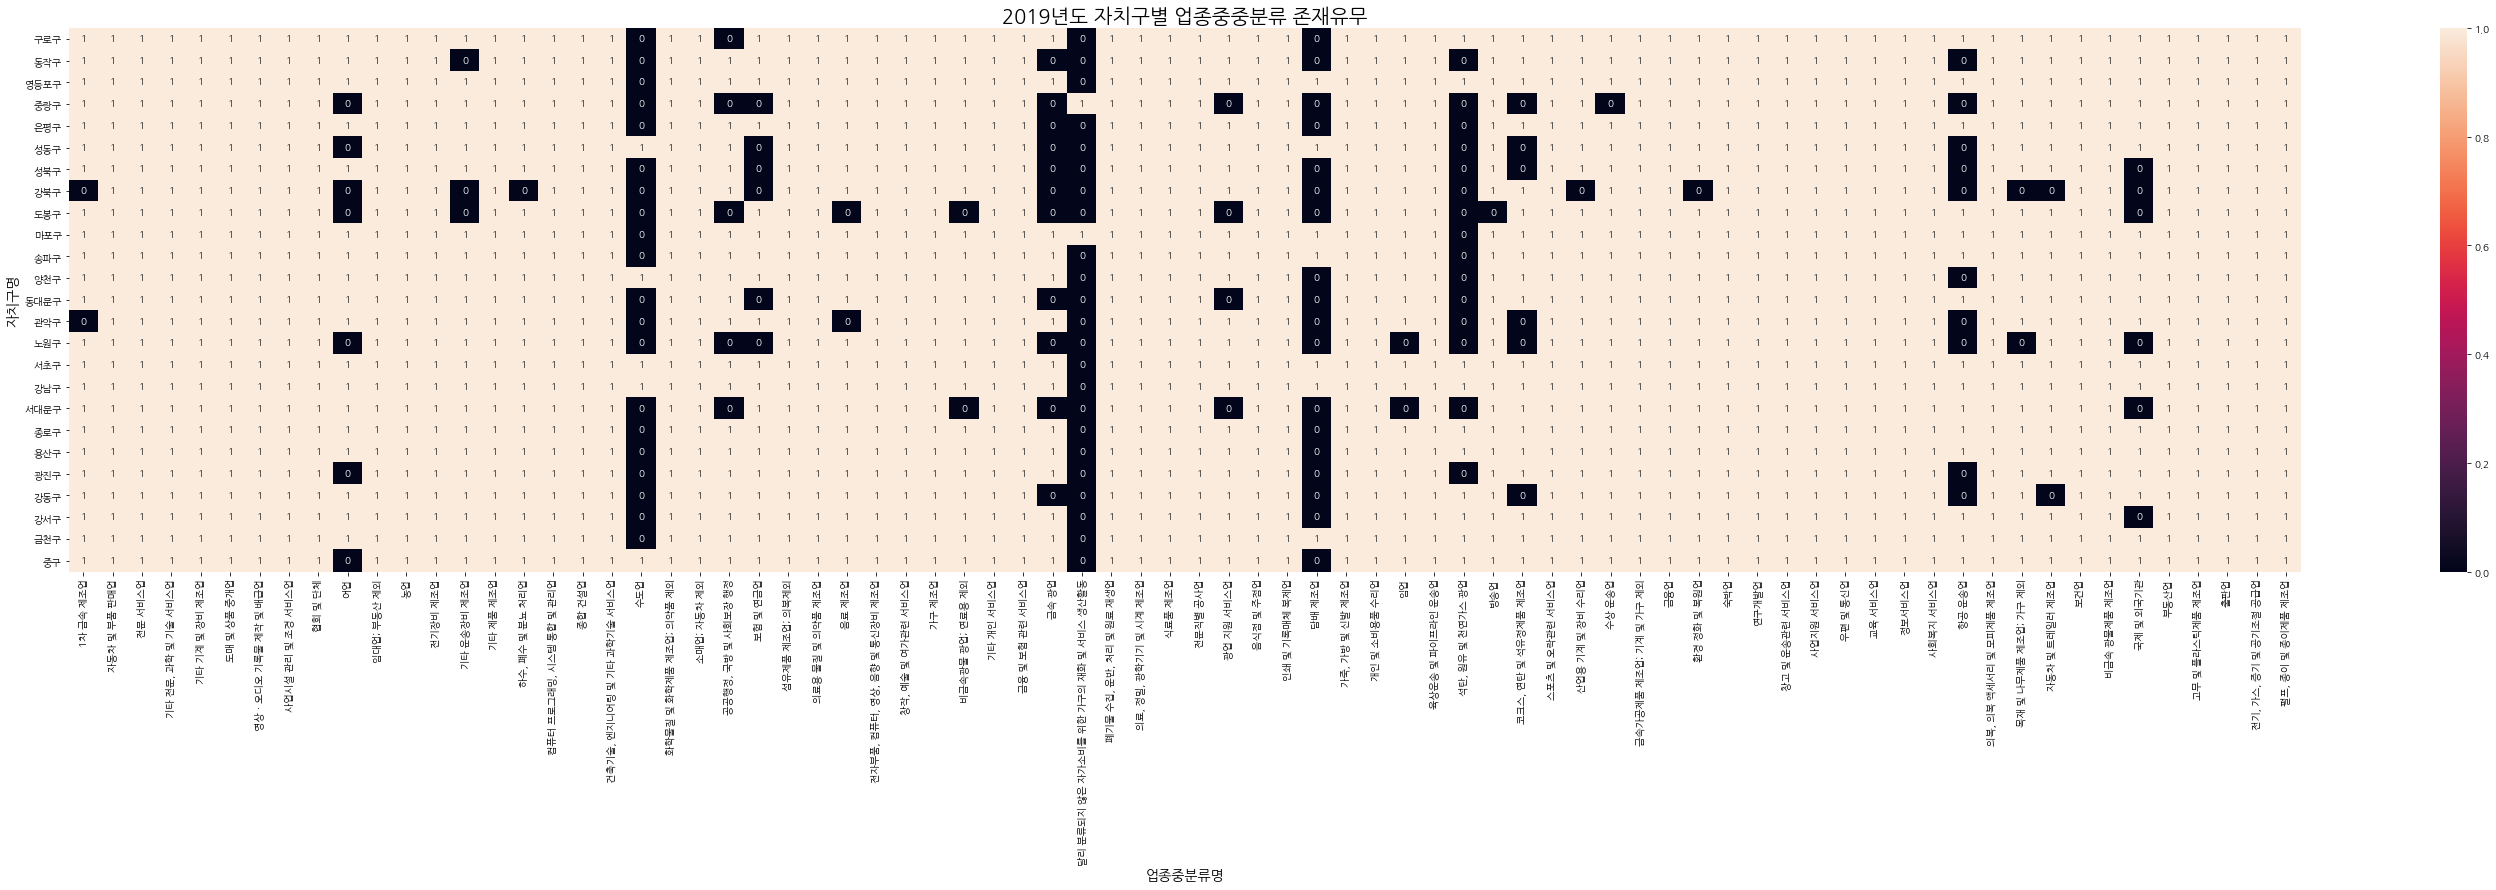

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2019[dataset_2019['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True)
plt.title('2019년도 자치구별 업종중중분류 존재유무', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()

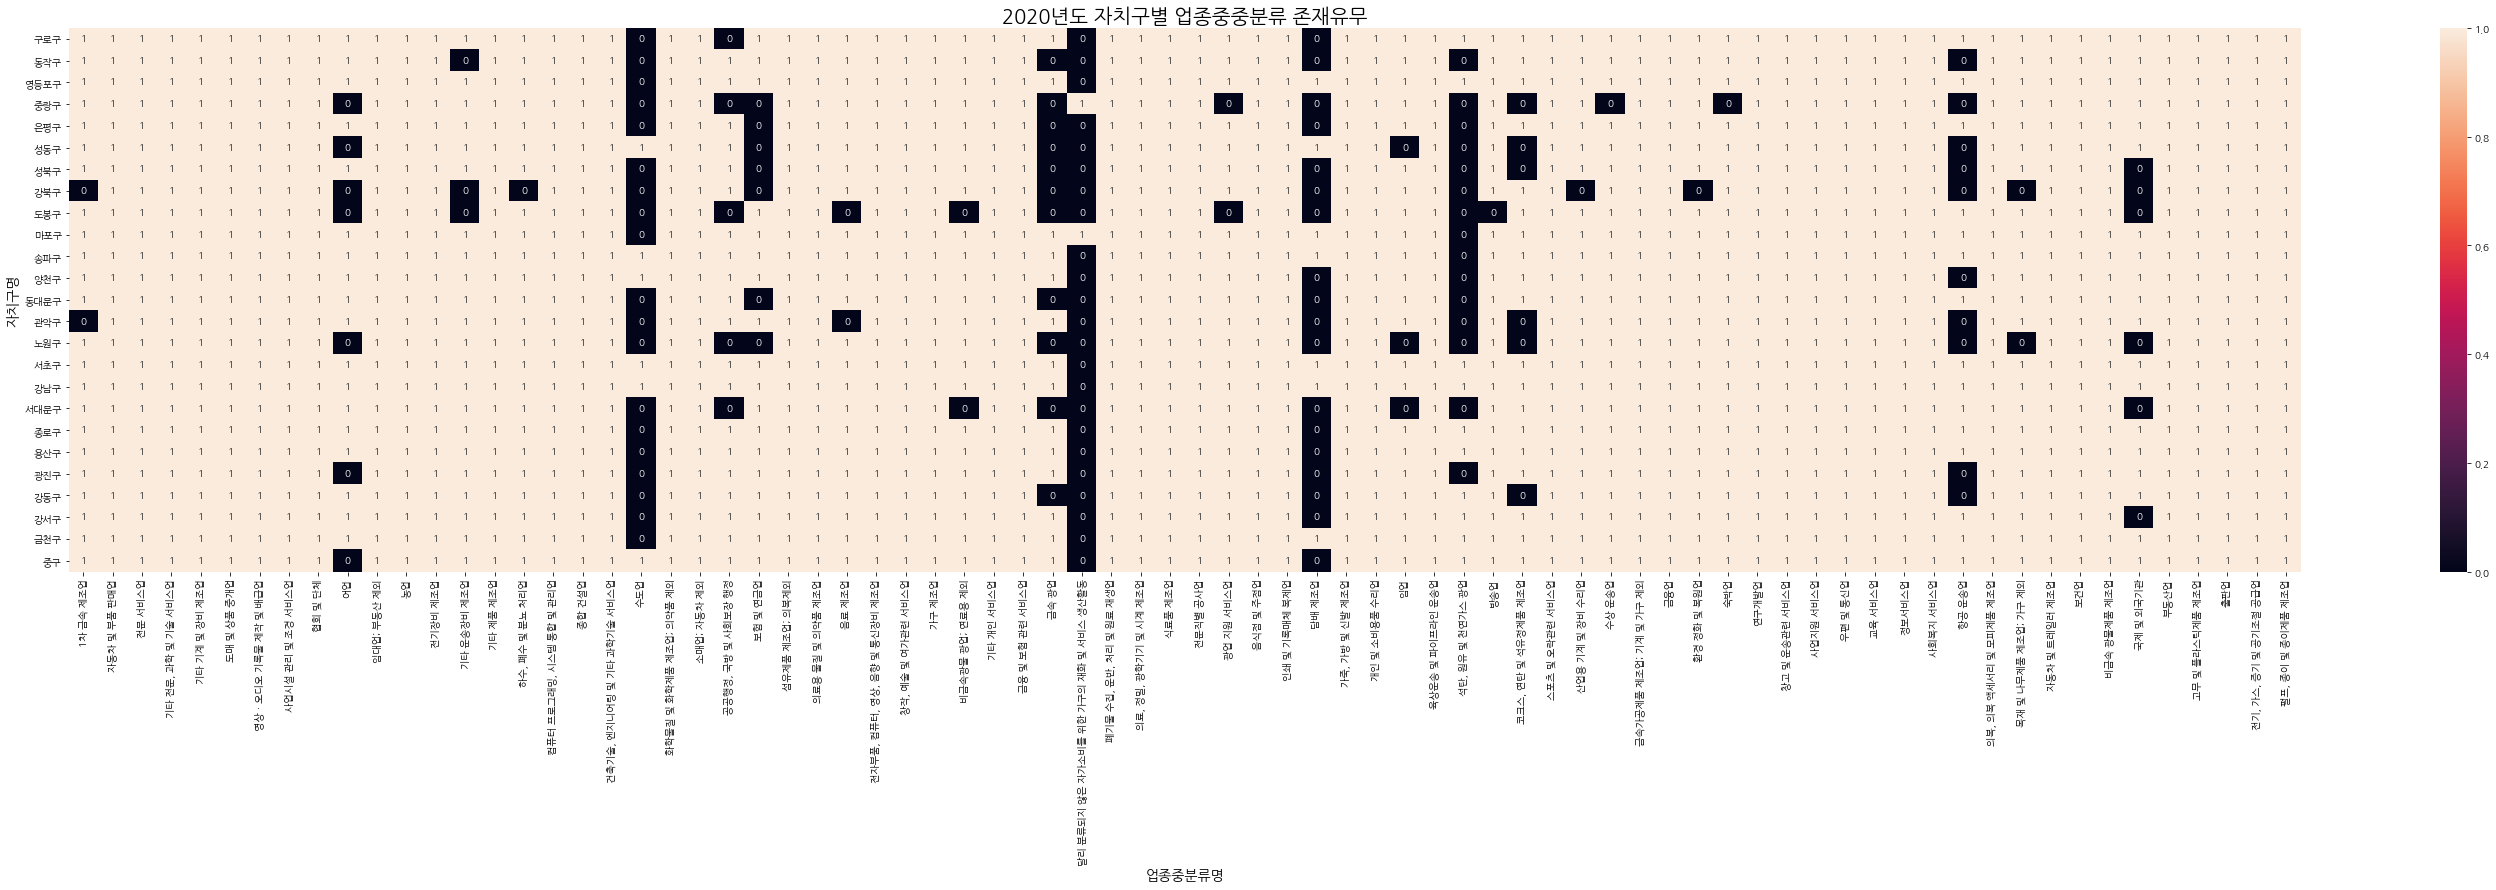

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2020[dataset_2020['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True)
plt.title('2020년도 자치구별 업종중중분류 존재유무', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()

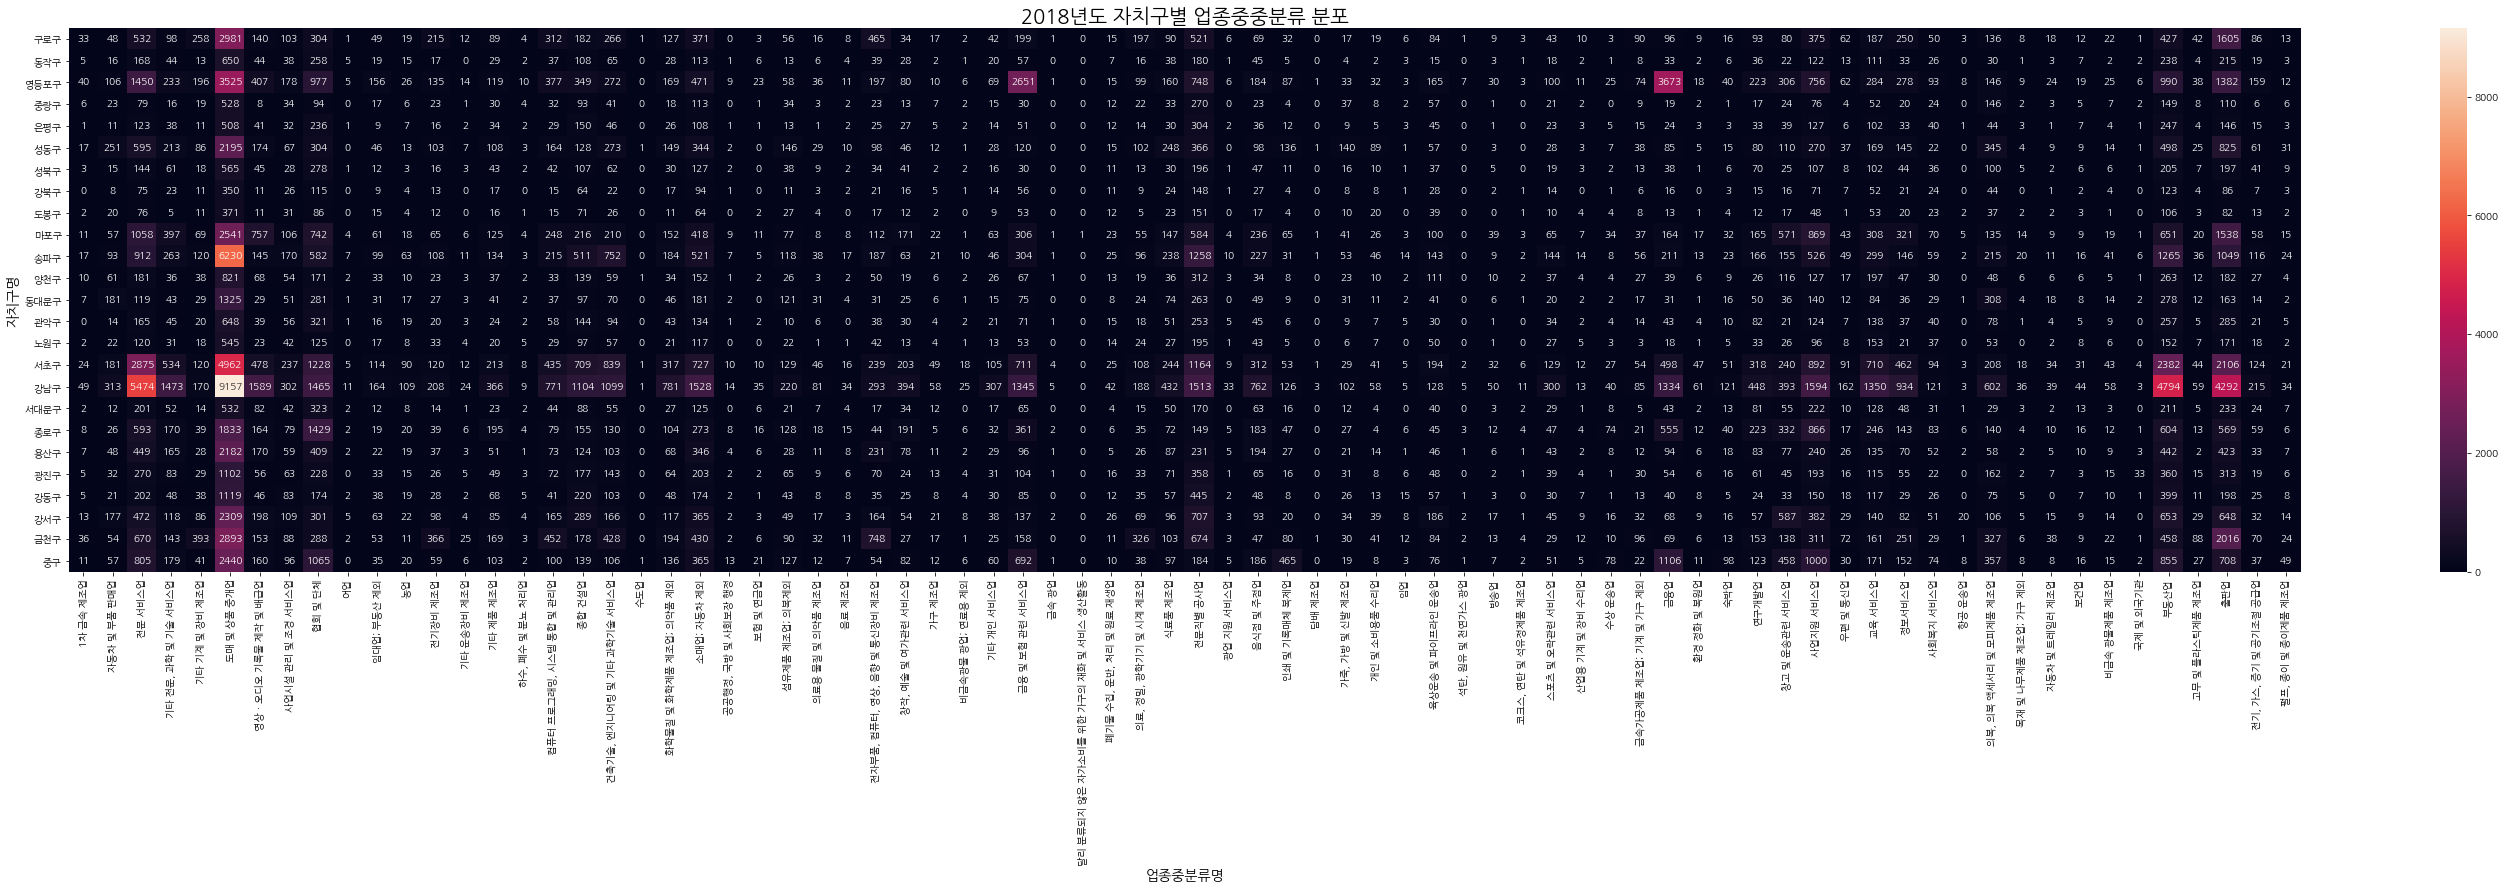

,1차 금속 제조업,자동차 및 부품 판매업,전문 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 기계 및 장비 제조업,도매 및 상품 중개업,영상ㆍ오디오 기록물 제작 및 배급업,사업시설 관리 및 조경 서비스업,협회 및 단체,어업,...,목재 및 나무제품 제조업; 가구 제외,자동차 및 트레일러 제조업,보건업,비금속 광물제품 제조업,국제 및 외국기관,부동산업,고무 및 플라스틱제품 제조업,출판업,"전기, 가스, 증기 및 공기조절 공급업","펄프, 종이 및 종이제품 제조업"
구로구,33,48,532,98,258,2981,140,103,304,1,...,8,18,12,22,1,427,42,1605,86,13
동작구,5,16,168,44,13,650,44,38,258,5,...,1,3,7,2,2,238,4,215,19,3
영등포구,40,106,1450,233,196,3525,407,178,977,5,...,9,24,19,25,6,990,38,1382,159,12
중랑구,6,23,79,16,19,528,8,34,94,0,...,2,3,5,7,2,149,8,110,6,6
은평구,1,11,123,38,11,508,41,32,236,1,...,3,1,7,4,1,247,4,146,15,3


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2018[dataset_2018['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종중분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack = big_pack.astype(int)

plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True, fmt='d')
plt.title('2018년도 자치구별 업종중중분류 분포', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()
big_pack.head()

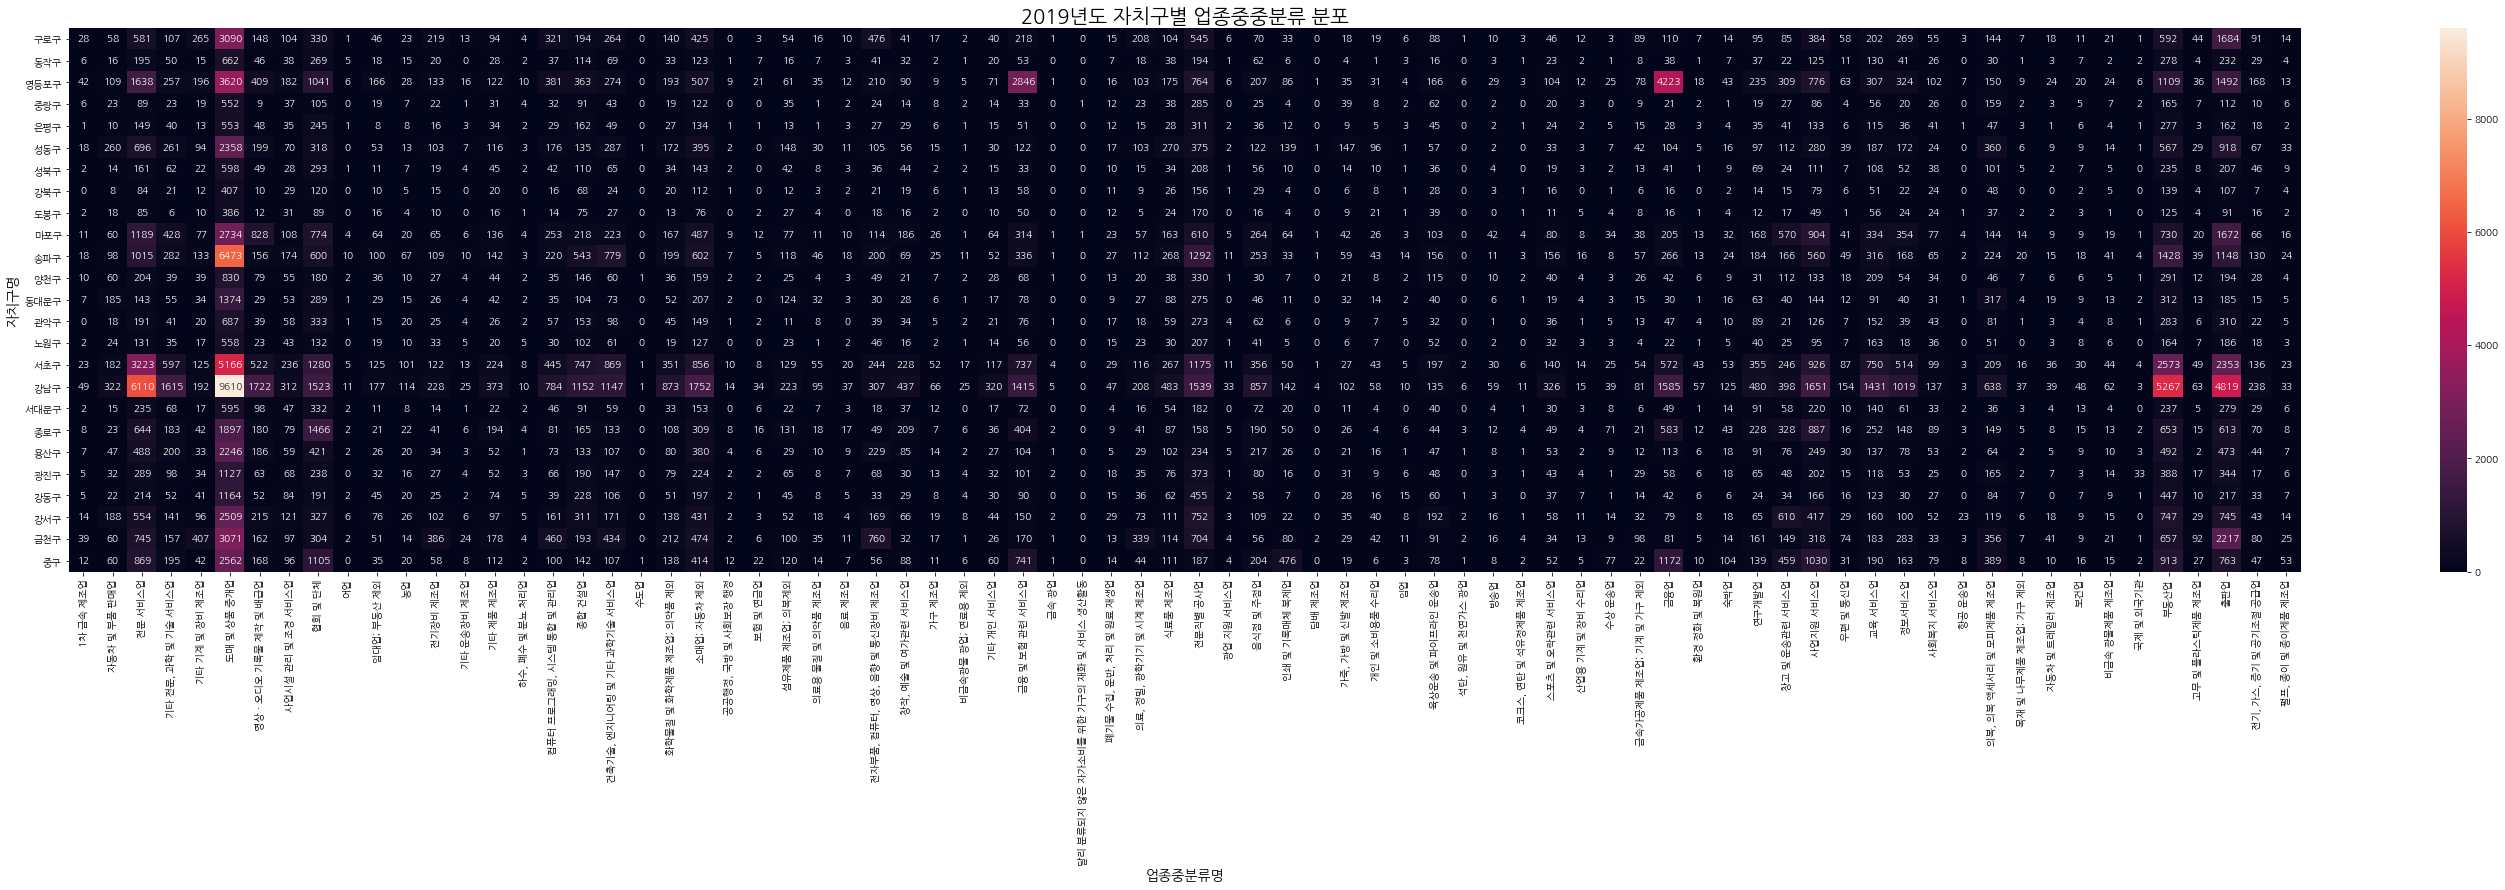

,1차 금속 제조업,자동차 및 부품 판매업,전문 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 기계 및 장비 제조업,도매 및 상품 중개업,영상ㆍ오디오 기록물 제작 및 배급업,사업시설 관리 및 조경 서비스업,협회 및 단체,어업,...,목재 및 나무제품 제조업; 가구 제외,자동차 및 트레일러 제조업,보건업,비금속 광물제품 제조업,국제 및 외국기관,부동산업,고무 및 플라스틱제품 제조업,출판업,"전기, 가스, 증기 및 공기조절 공급업","펄프, 종이 및 종이제품 제조업"
구로구,28,58,581,107,265,3090,148,104,330,1,...,7,18,11,21,1,592,44,1684,91,14
동작구,6,16,195,50,15,662,46,38,269,5,...,1,3,7,2,2,278,4,232,29,4
영등포구,42,109,1638,257,196,3620,409,182,1041,6,...,9,24,20,24,6,1109,36,1492,168,13
중랑구,6,23,89,23,19,552,9,37,105,0,...,2,3,5,7,2,165,7,112,10,6
은평구,1,10,149,40,13,553,48,35,245,1,...,3,1,6,4,1,277,3,162,18,2


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2019[dataset_2019['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종중분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack = big_pack.astype(int)

plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True, fmt='d')
plt.title('2019년도 자치구별 업종중중분류 분포', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()
big_pack.head()

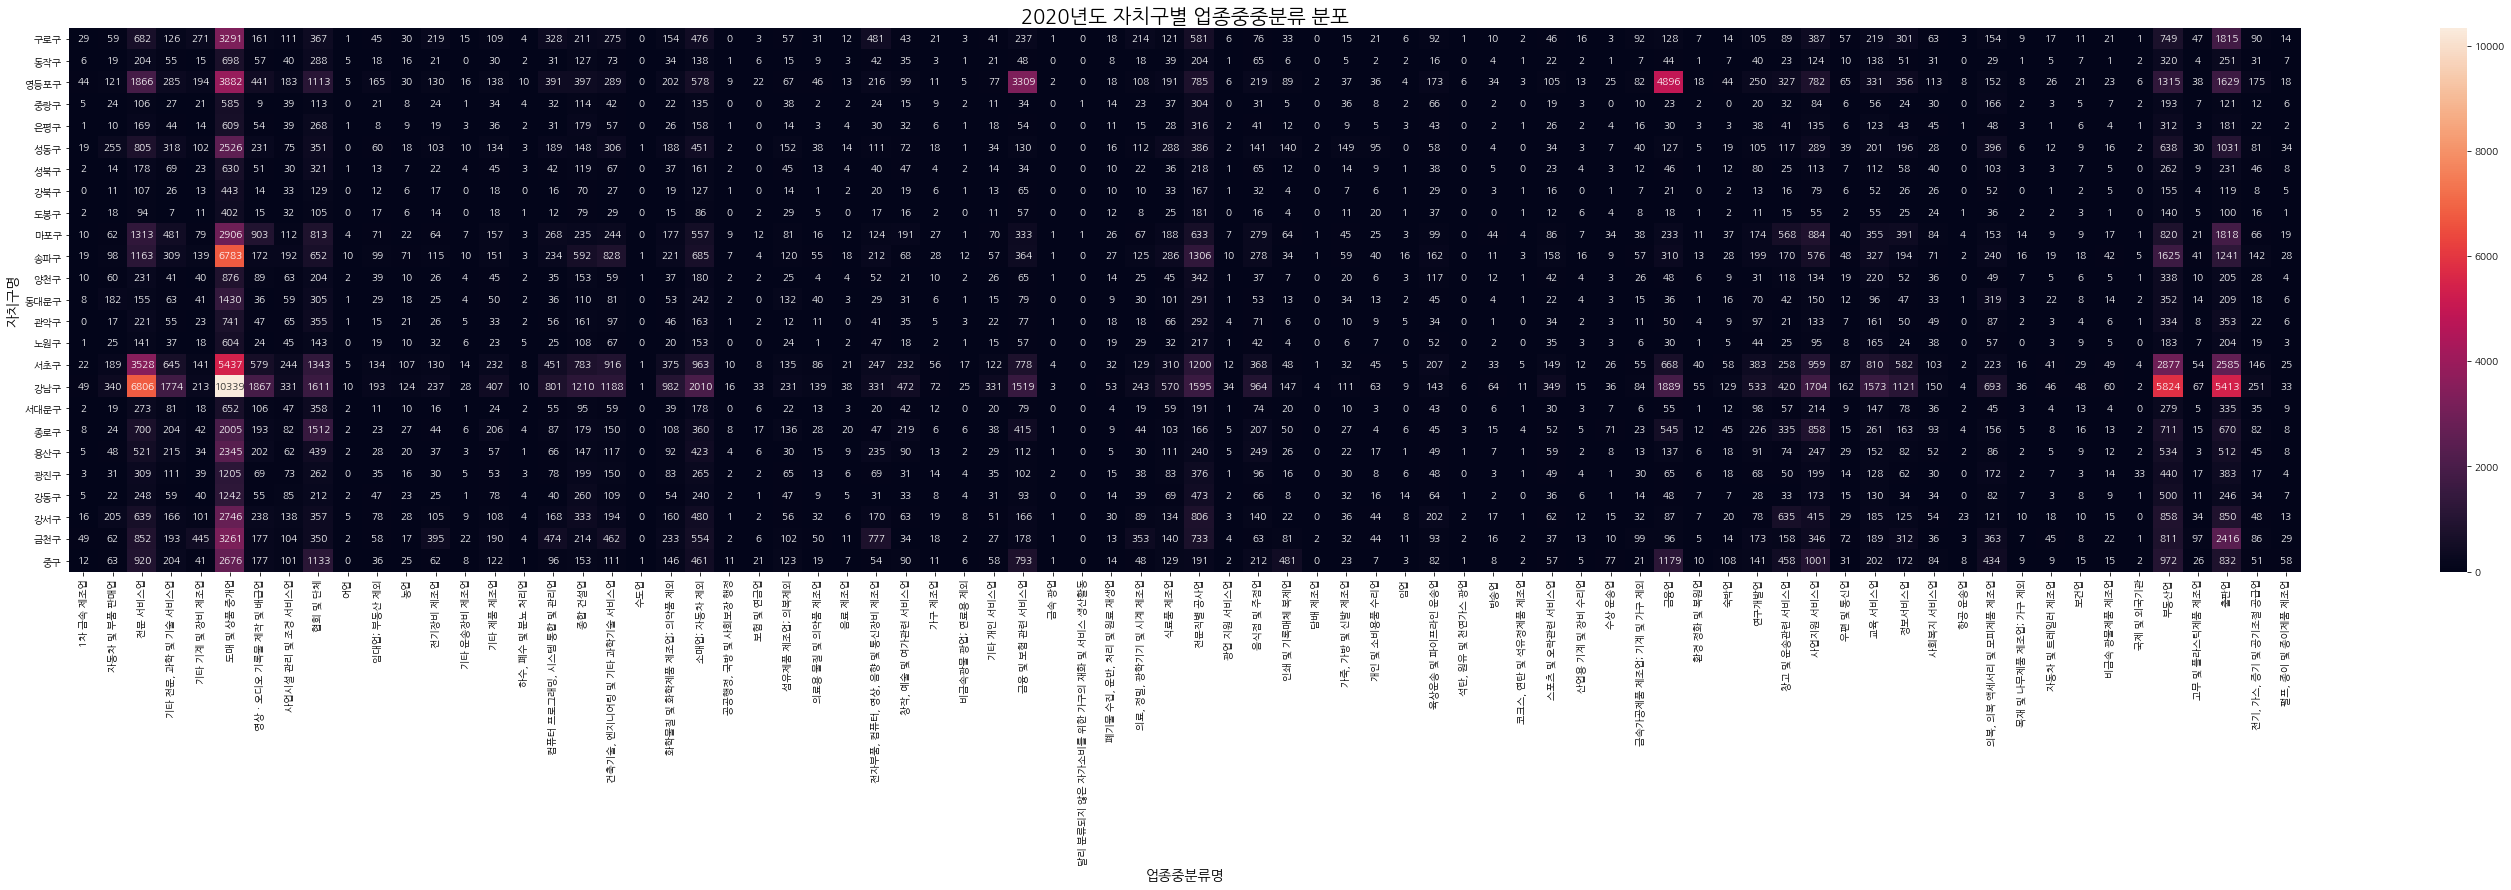

,1차 금속 제조업,자동차 및 부품 판매업,전문 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 기계 및 장비 제조업,도매 및 상품 중개업,영상ㆍ오디오 기록물 제작 및 배급업,사업시설 관리 및 조경 서비스업,협회 및 단체,어업,...,목재 및 나무제품 제조업; 가구 제외,자동차 및 트레일러 제조업,보건업,비금속 광물제품 제조업,국제 및 외국기관,부동산업,고무 및 플라스틱제품 제조업,출판업,"전기, 가스, 증기 및 공기조절 공급업","펄프, 종이 및 종이제품 제조업"
구로구,29,59,682,126,271,3291,161,111,367,1,...,9,17,11,21,1,749,47,1815,90,14
동작구,6,19,204,55,15,698,57,40,288,5,...,1,5,7,1,2,320,4,251,31,7
영등포구,44,121,1866,285,194,3882,441,183,1113,5,...,8,26,21,23,6,1315,38,1629,175,18
중랑구,5,24,106,27,21,585,9,39,113,0,...,2,3,5,7,2,193,7,121,12,6
은평구,1,10,169,44,14,609,54,39,268,1,...,3,1,6,4,1,312,3,181,22,2


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset_2020[dataset_2020['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종중분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack = big_pack.astype(int)

plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True, fmt='d')
plt.title('2020년도 자치구별 업종중중분류 분포', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('업종중분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()
big_pack.head()

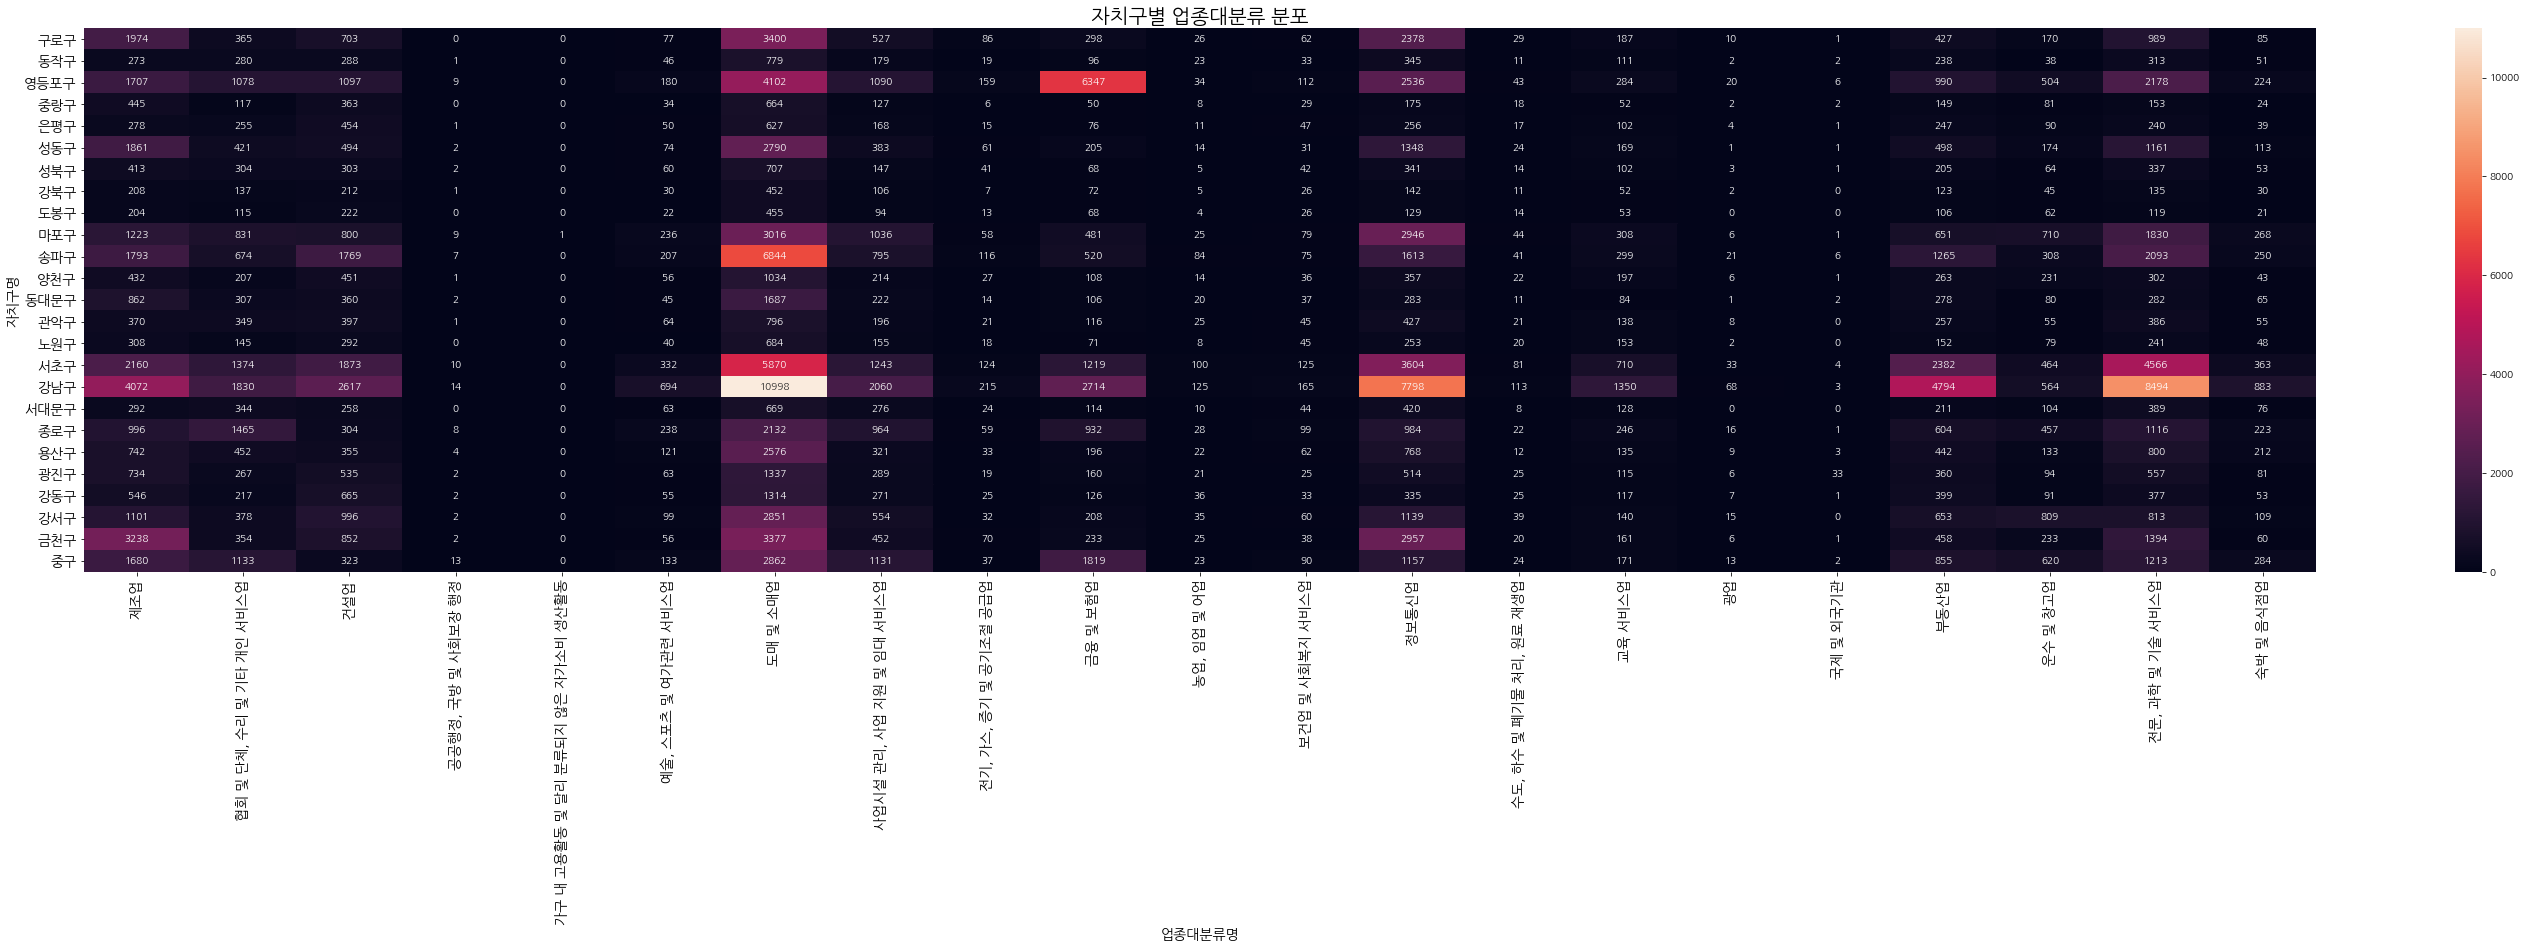

Index(['구로구', '동작구', '영등포구', '중랑구', '은평구', '성동구', '성북구', '강북구', '도봉구', '마포구',
       '송파구', '양천구', '동대문구', '관악구', '노원구', '서초구', '강남구', '서대문구', '종로구', '용산구',
       '광진구', '강동구', '강서구', '금천구', '중구'],
      dtype='object')
[3 2 0 2 2 3 2 2 2 3 4 2 2 2 2 4 1 2 3 3 2 2 3 3 3]
구로구:3
동작구:2
영등포구:0
중랑구:2
은평구:2
성동구:3
성북구:2
강북구:2
도봉구:2
마포구:3
송파구:4
양천구:2
동대문구:2
관악구:2
노원구:2
서초구:4
강남구:1
서대문구:2
종로구:3
용산구:3
광진구:2
강동구:2
강서구:3
금천구:3
중구:3


In [30]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    title = list(set(temp['업종대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종대분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=big)
big_pack = big_pack.fillna(0)
big_pack = big_pack.astype(int)

plt.figure(figsize=(50,10))
sns.heatmap(big_pack, annot=True, fmt='d')
plt.title('자치구별 업종대분류 분포', fontsize=20)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90, fontsize=14)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index, fontsize=14)
plt.xlabel('업종대분류명', fontsize=14)
plt.ylabel('자치구명', fontsize=14)
plt.show()

from sklearn.cluster import KMeans

datapoints = big_pack.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(big_pack.index)
print(kmeans.labels_)
for i in range(25):
    print("{}:{}".format(big_pack.index[i], kmeans.labels_[i]))

In [15]:
# 시군구에 존재하는 업종대분류명과 존재하지 않는 것을 dataframe으로 표현
pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=big)
# big_pack.head(10)

['판단제외', '중견기업', '대기업', '중기업', '소기업', '미분류']
{'구로구': 11794, '동작구': 3128, '영등포구': 22700, '중랑구': 2499, '은평구': 2978, '성동구': 9825, '성북구': 3212, '강북구': 1796, '도봉구': 1727, '마포구': 14559, '송파구': 18780, '양천구': 4002, '동대문구': 4748, '관악구': 3727, '노원구': 2714, '서초구': 26637, '강남구': 49571, '서대문구': 3430, '종로구': 10894, '용산구': 7398, '광진구': 5237, '강동구': 4695, '강서구': 10033, '금천구': 13987, '중구': 13583}


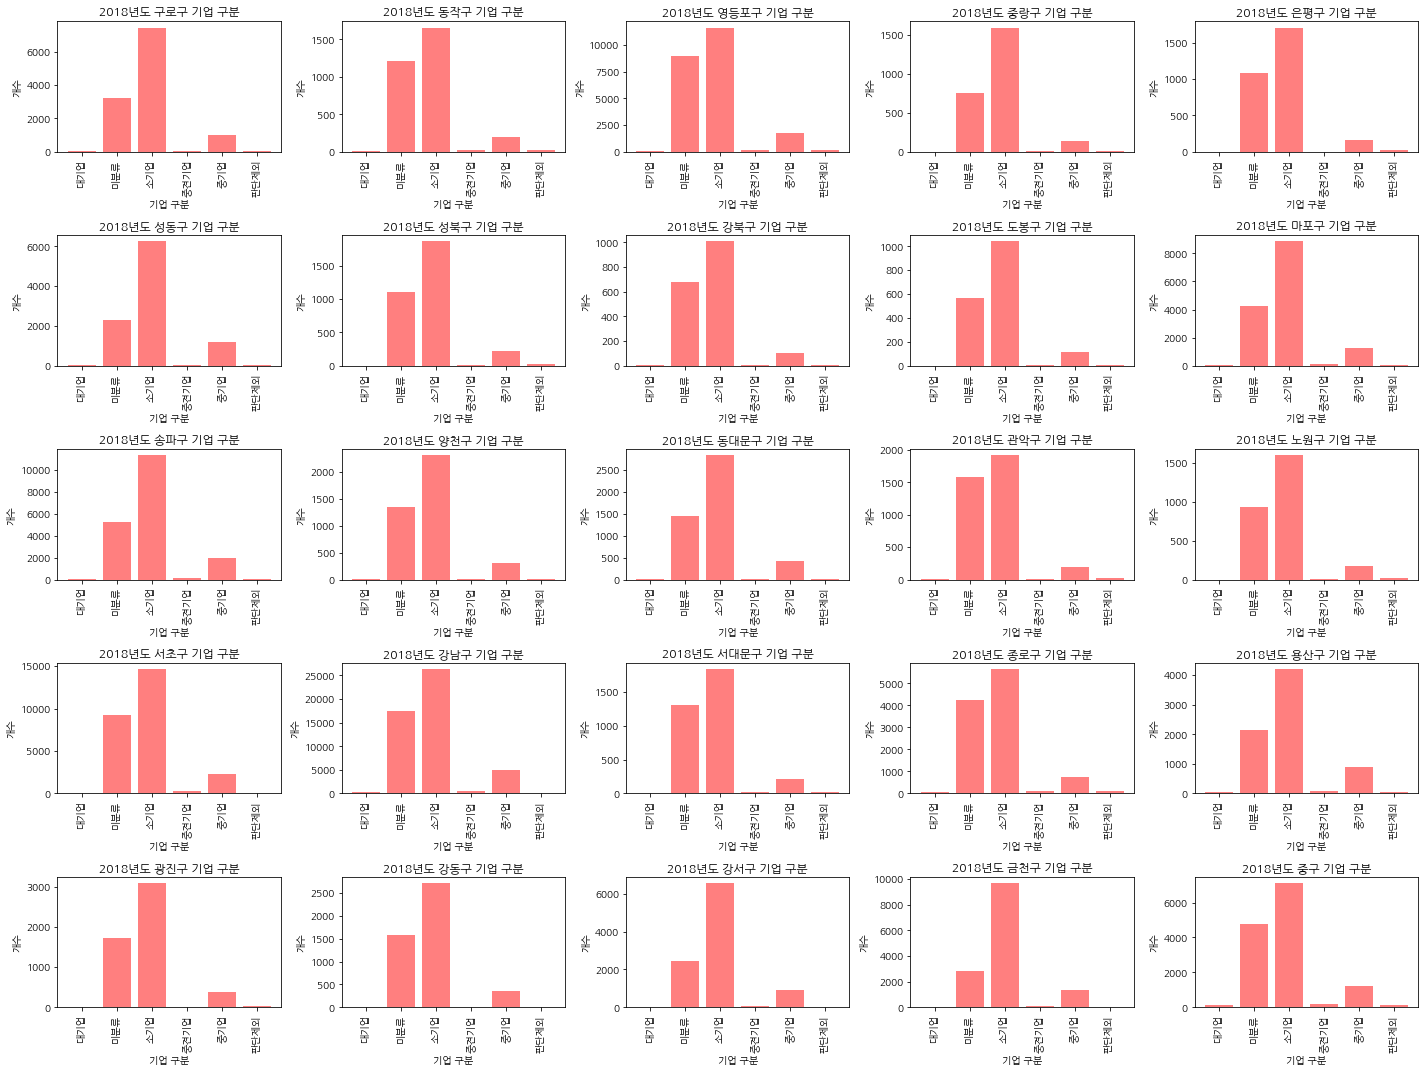

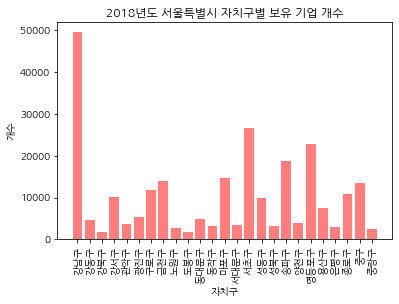

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
# 시군구별 기업 구분 개수 추출
company_dis = list(set(dataset['기업구분']))
print(company_dis)

plt.figure(figsize=(20,15))
gu_dic = {}
for index, gu in enumerate(sigoongu):

    base = [ 0 for i in range(len(company_dis))]
    temp = dataset_2018[dataset_2018['시군구명']==gu]
    pack = []
    title_count = {}
    for t in company_dis:
        temp_b = temp[temp['기업구분']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)
    big_pack = pd.DataFrame(pack)
    big_pack = big_pack.fillna(0)
    plt.subplot(5,5,index+1)
    plt.tight_layout()
    plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
    plt.xticks(rotation=90)
    plt.xlabel('기업 구분')
    plt.ylabel('개수')
    plt.title('2018년도 {} 기업 구분'.format(gu))
    gu_dic[gu] = sum(big_pack.loc[0].tolist())
plt.show()
big_pack = pd.DataFrame([gu_dic])
big_pack = big_pack.fillna(0)
plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
plt.xticks(rotation=90)
plt.title('2018년도 서울특별시 자치구별 보유 기업 개수')
plt.xlabel('자치구')
plt.ylabel('개수')
plt.show()
print(gu_dic)

['판단제외', '중견기업', '대기업', '중기업', '소기업', '미분류']
{'구로구': 12518, '동작구': 3362, '영등포구': 24372, '중랑구': 2660, '은평구': 3209, '성동구': 10721, '성북구': 3420, '강북구': 1968, '도봉구': 1838, '마포구': 15651, '송파구': 20045, '양천구': 4188, '동대문구': 5035, '관악구': 3992, '노원구': 2846, '서초구': 28511, '강남구': 53522, '서대문구': 3795, '종로구': 11435, '용산구': 7871, '광진구': 5506, '강동구': 4987, '강서구': 11046, '금천구': 15106, '중구': 14325}


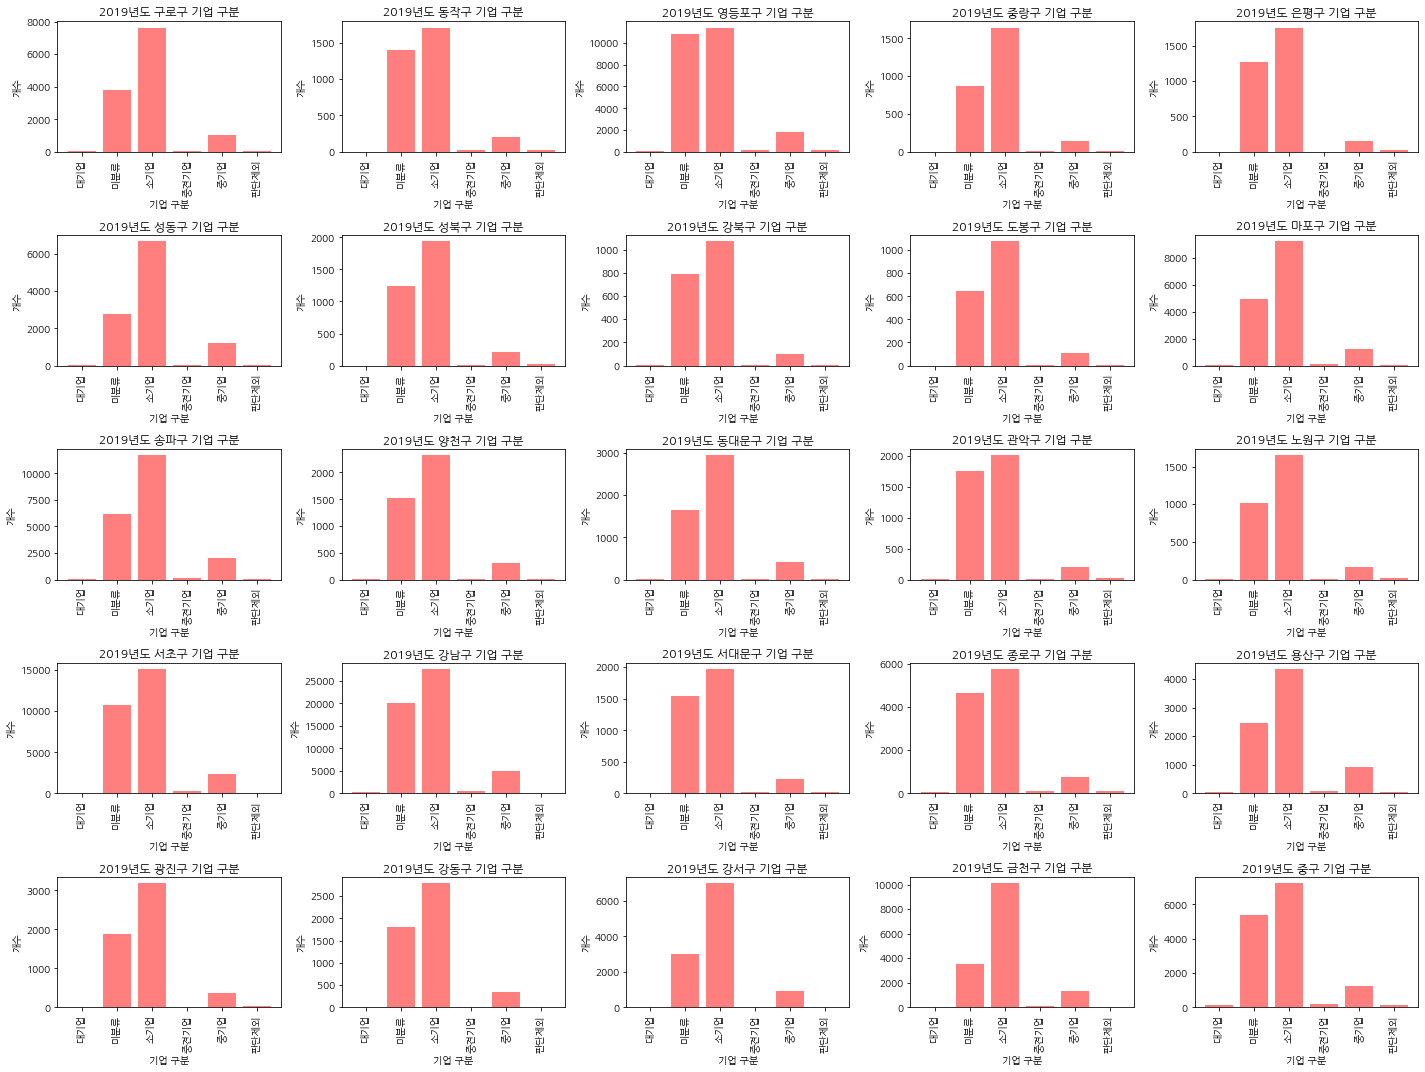

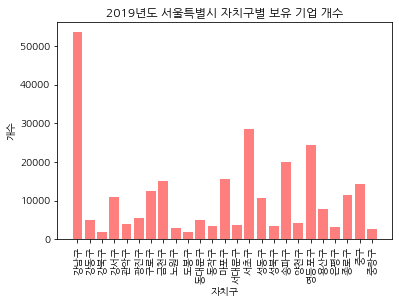

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
# 시군구별 기업 구분 개수 추출
company_dis = list(set(dataset['기업구분']))
print(company_dis)


plt.figure(figsize=(20,15))
gu_dic = {}
for index, gu in enumerate(sigoongu):

    base = [ 0 for i in range(len(company_dis))]
    temp = dataset_2019[dataset_2019['시군구명']==gu]
    pack = []
    title_count = {}
    for t in company_dis:
        temp_b = temp[temp['기업구분']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)
    big_pack = pd.DataFrame(pack)
    big_pack = big_pack.fillna(0)
    plt.subplot(5,5,index+1)
    plt.tight_layout()
    plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
    plt.xticks(rotation=90)
    plt.xlabel('기업 구분')
    plt.ylabel('개수')
    plt.title('2019년도 {} 기업 구분'.format(gu))
    gu_dic[gu] = sum(big_pack.loc[0].tolist())
plt.show()
big_pack = pd.DataFrame([gu_dic])
big_pack = big_pack.fillna(0)
plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
plt.xticks(rotation=90)
plt.title('2019년도 서울특별시 자치구별 보유 기업 개수')
plt.xlabel('자치구')
plt.ylabel('개수')
plt.show()
print(gu_dic)

['판단제외', '중견기업', '대기업', '중기업', '소기업', '미분류']
{'구로구': 13548, '동작구': 3591, '영등포구': 26893, '중랑구': 2865, '은평구': 3487, '성동구': 11723, '성북구': 3688, '강북구': 2150, '도봉구': 1963, '마포구': 16744, '송파구': 21446, '양천구': 4457, '동대문구': 5380, '관악구': 4351, '노원구': 3056, '서초구': 30633, '강남구': 58456, '서대문구': 4183, '종로구': 11989, '용산구': 8364, '광진구': 5901, '강동구': 5389, '강서구': 12143, '금천구': 16363, '중구': 14923}


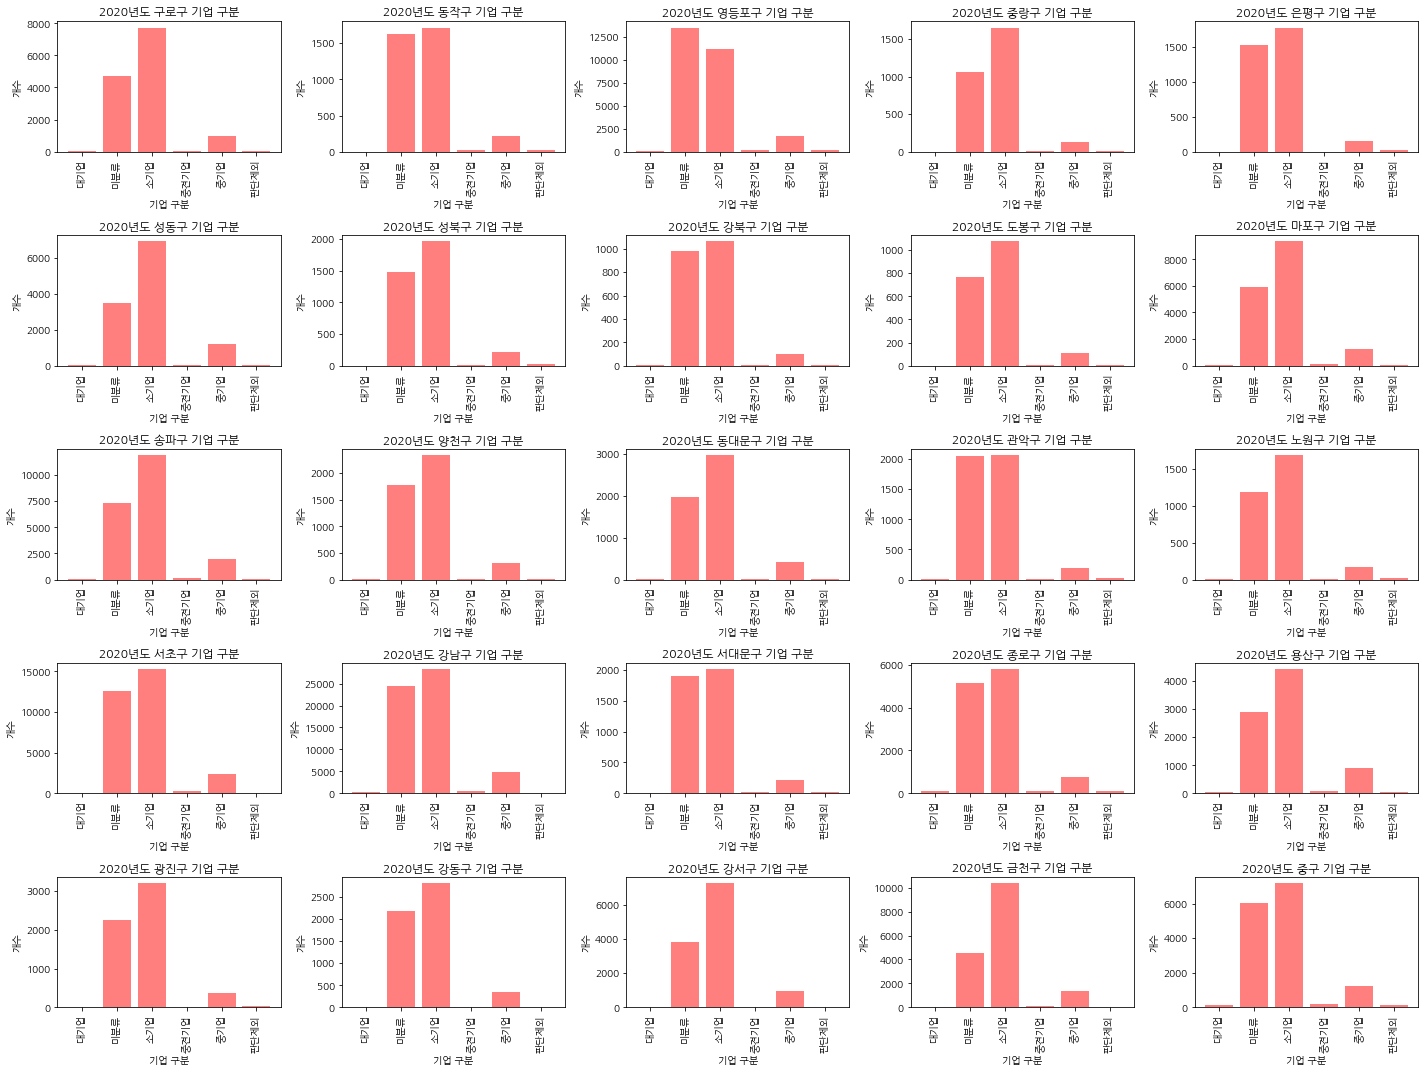

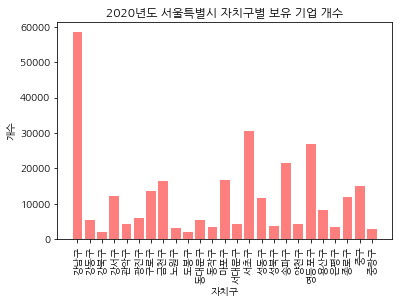

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
# 시군구별 기업 구분 개수 추출
company_dis = list(set(dataset['기업구분']))
print(company_dis)


plt.figure(figsize=(20,15))
gu_dic = {}
for index, gu in enumerate(sigoongu):

    base = [ 0 for i in range(len(company_dis))]
    temp = dataset_2020[dataset_2020['시군구명']==gu]
    pack = []
    title_count = {}
    for t in company_dis:
        temp_b = temp[temp['기업구분']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)
    big_pack = pd.DataFrame(pack)
    big_pack = big_pack.fillna(0)
    plt.subplot(5,5,index+1)
    plt.tight_layout()
    plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
    plt.xticks(rotation=90)
    plt.xlabel('기업 구분')
    plt.ylabel('개수')
    plt.title('2020년도 {} 기업 구분'.format(gu))
    gu_dic[gu] = sum(big_pack.loc[0].tolist())
plt.show()
big_pack = pd.DataFrame([gu_dic])
big_pack = big_pack.fillna(0)
plt.bar(big_pack.columns, big_pack.loc[0].tolist(), color='red', alpha=0.5)
plt.xticks(rotation=90)
plt.title('2020년도 서울특별시 자치구별 보유 기업 개수')
plt.xlabel('자치구')
plt.ylabel('개수')
plt.show()
print(gu_dic)

In [19]:
# 2018부터 2020까지 기업 개수에 대한 변화는 존재하지 않음
# 즉 망한 회사가 없다고 봐도 괜찮을

[{'판단제외': 1153, '중견기업': 1889, '대기업': 828, '중기업': 22546, '소기업': 144756, '미분류': 82482}]


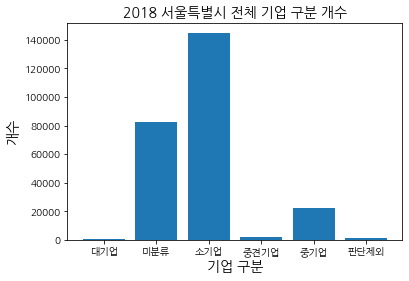

In [20]:
# 시군구 전체 기업 구분 개수 추출
pack = []
title_count = {}
for t in company_dis:
    temp_b = dataset_2018[dataset_2018['기업구분']==t]

    count = temp_b['총기업수'].sum()
    title_count[t] = count
pack.append(title_count)
print(pack)
big_pack = pd.DataFrame(pack)
big_pack = big_pack.fillna(0)
plt.title("2018 서울특별시 전체 기업 구분 개수", fontsize=14)
plt.xlabel('기업 구분', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.bar(big_pack.columns, big_pack.loc[0].tolist())
plt.show()

[{'판단제외': 1176, '중견기업': 1891, '대기업': 849, '중기업': 22653, '소기업': 149653, '미분류': 95707}]


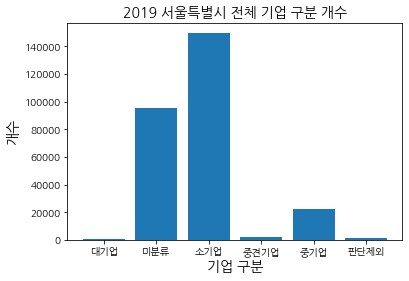

In [21]:
pack = []
title_count = {}
for t in company_dis:
    temp_b = dataset_2019[dataset_2019['기업구분']==t]

    count = temp_b['총기업수'].sum()
    title_count[t] = count
pack.append(title_count)
print(pack)
big_pack = pd.DataFrame(pack)
big_pack = big_pack.fillna(0)
plt.title("2019 서울특별시 전체 기업 구분 개수", fontsize=14)
plt.xlabel('기업 구분', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.bar(big_pack.columns, big_pack.loc[0].tolist())
plt.show()

[{'판단제외': 1198, '중견기업': 1908, '대기업': 900, '중기업': 22589, '소기업': 151851, '미분류': 115240}]


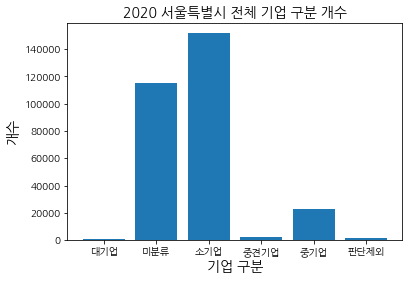

In [22]:
pack = []
title_count = {}
for t in company_dis:
    temp_b = dataset_2020[dataset_2020['기업구분']==t]

    count = temp_b['총기업수'].sum()
    title_count[t] = count
pack.append(title_count)
print(pack)
big_pack = pd.DataFrame(pack)
big_pack = big_pack.fillna(0)
plt.title("2020 서울특별시 전체 기업 구분 개수", fontsize=14)
plt.xlabel('기업 구분', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.bar(big_pack.columns, big_pack.loc[0].tolist())
plt.show()

In [23]:
from numpy import dot
from numpy.linalg import norm
import itertools
import operator
import pprint

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종중분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)

comb = list(itertools.combinations(sigoongu, 2))
result = {}
for x in comb:
    result['{}:{}'.format(x[0], x[1])] = cos_sim(big_pack.loc[x[0]].tolist(), big_pack.loc[x[1]].tolist())

sdict= sorted(result.items(), key=operator.itemgetter(1), reverse=True)
print('유사도가 높은 지역 Top 10 : ')
# pprint.pprint(sdict[:])

유사도가 높은 지역 Top 10 : 


In [24]:
from sklearn.cluster import KMeans
import seaborn as sns

pack = []
for gu in sigoongu:
    temp = dataset_2019[dataset_2019['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['업종중분류명']==t]

        count = temp_b['총기업수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack = big_pack.astype(int)


datapoints = big_pack.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(big_pack.index)
print(kmeans.labels_)
for i in range(25):
    print("{}:{}".format(big_pack.index[i], kmeans.labels_[i]))

Index(['구로구', '동작구', '영등포구', '중랑구', '은평구', '성동구', '성북구', '강북구', '도봉구', '마포구',
       '송파구', '양천구', '동대문구', '관악구', '노원구', '서초구', '강남구', '서대문구', '종로구', '용산구',
       '광진구', '강동구', '강서구', '금천구', '중구'],
      dtype='object')
[2 0 4 0 0 2 0 0 0 2 3 0 0 0 0 3 1 0 2 2 0 0 2 2 2]
구로구:2
동작구:0
영등포구:4
중랑구:0
은평구:0
성동구:2
성북구:0
강북구:0
도봉구:0
마포구:2
송파구:3
양천구:0
동대문구:0
관악구:0
노원구:0
서초구:3
강남구:1
서대문구:0
종로구:2
용산구:2
광진구:0
강동구:0
강서구:2
금천구:2
중구:2
